<a href="https://colab.research.google.com/github/arifsoul/DIS-2/blob/main/DIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.backend import clear_session
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from skimage.transform import resize
import imgaug.augmenters as iaa
import cv2

batch_size = 32
size_img = (100, 100, 3)

#Prepare dataset


In [3]:
path_dataset = '/content/drive/MyDrive/Citra BISINDO'
folders = sorted(os.listdir(path_dataset))
print(folders)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
dataset_collection = []
target = []
classes = []

cls_count = 0
print('ID\tSample\t\tName')
for folder in folders:
    dir = os.path.join(path_dataset, folder)
    filename = os.listdir(dir)
    count_img = 0

    if len(filename) > 0:
        for f in filename:
            img_path =  os.path.join(dir, f)  
            dataset_collection.append(img_path)
            target.append(cls_count)
            count_img += 1 

        print('{}\t{} sample\t{}'.format(cls_count, count_img, folder))
        classes.append(folder)
        cls_count += 1

print('\nTotal:\t{} sample'.format(len(dataset_collection)))

ID	Sample		Name
0	12 sample	A
1	12 sample	B
2	12 sample	C
3	12 sample	D
4	12 sample	E
5	12 sample	F
6	12 sample	G
7	12 sample	H
8	12 sample	I
9	12 sample	J
10	12 sample	K
11	12 sample	L
12	12 sample	M
13	12 sample	N
14	12 sample	O
15	12 sample	P
16	12 sample	Q
17	12 sample	R
18	12 sample	S
19	12 sample	T
20	12 sample	U
21	12 sample	V
22	12 sample	W
23	12 sample	X
24	12 sample	Y
25	12 sample	Z

Total:	312 sample


In [92]:
dataset_collection

['/content/drive/MyDrive/Citra BISINDO/A/body dot (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/wall white (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/wall white (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body white (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body dot (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/wall white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body dot (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body dot (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body white (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/body white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/A/wall white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/B/wall white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/B/body dot (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/B/wall white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/B/wall white (4).jpg',
 '/content/drive/M

In [5]:
all_data = []
labels = []
count = 0

for img_path, label in zip(dataset_collection, target):
    print(count)
    orig_img = cv2.imread(img_path)
    seq_aug = [
        None,
        iaa.Affine(rotate=10),
        iaa.Affine(rotate=-10),
        iaa.Affine(rotate=20),
        iaa.Affine(rotate=-20),
        iaa.Affine(rotate=30),
        iaa.Affine(rotate=-30),
        iaa.Affine(rotate=30),
        iaa.Affine(rotate=-30),
        iaa.Fliplr(0.5)
    ]

    for aug in seq_aug:
        img = orig_img.copy()
        if aug != None:
            img = aug(image=img)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img = resize(img, size_img)
        all_data.append(img)
        labels.append(label)
    count += 1

print('All Training:', len(all_data))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#Split Train, Val, Test

In [6]:
np.save("/content/drive/MyDrive/numpy_dis_2/all_data.npy", all_data)
np.save("/content/drive/MyDrive/numpy_dis_2/labels.npy", labels)

In [12]:
all_data = np.load("/content/drive/MyDrive/numpy_dis_2/all_data.npy")
labels = np.load("/content/drive/MyDrive/numpy_dis_2/labels.npy")

In [10]:
classes_folder = sorted(os.listdir('/content/drive/MyDrive/Citra BISINDO'))
classes_folder

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=42, stratify=labels)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
X_test, X_val, y_test, y_val = np.array(X_test), np.array(X_val), np.array(y_test), np.array(y_val)

print('ID\tData Train\tData Val\tData Test\tName')
for i in range(len(classes_folder)):
    count_train, count_val, count_test = len(np.where(y_train==i)[0]), len(np.where(y_val==i)[0]), len(np.where(y_test==i)[0])
    print('{}\t{} sample\t{} sample\t{} sample\t{}'.format(i, count_train, count_val, count_test, classes_folder[i]))
print('\nTotal:\t {} sample\t {} sample\t {} sample'.format(len(y_train), len(y_val), len(y_test)))

ID	Data Train	Data Val	Data Test	Name
0	96 sample	12 sample	12 sample	A
1	96 sample	12 sample	12 sample	B
2	96 sample	12 sample	12 sample	C
3	96 sample	12 sample	12 sample	D
4	96 sample	12 sample	12 sample	E
5	96 sample	12 sample	12 sample	F
6	96 sample	12 sample	12 sample	G
7	96 sample	12 sample	12 sample	H
8	96 sample	12 sample	12 sample	I
9	96 sample	12 sample	12 sample	J
10	96 sample	12 sample	12 sample	K
11	96 sample	12 sample	12 sample	L
12	96 sample	12 sample	12 sample	M
13	96 sample	12 sample	12 sample	N
14	96 sample	12 sample	12 sample	O
15	96 sample	12 sample	12 sample	P
16	96 sample	12 sample	12 sample	Q
17	96 sample	12 sample	12 sample	R
18	96 sample	12 sample	12 sample	S
19	96 sample	12 sample	12 sample	T
20	96 sample	12 sample	12 sample	U
21	96 sample	12 sample	12 sample	V
22	96 sample	12 sample	12 sample	W
23	96 sample	12 sample	12 sample	X
24	96 sample	12 sample	12 sample	Y
25	96 sample	12 sample	12 sample	Z

Total:	 2496 sample	 312 sample	 312 sample


In [95]:
y_train[0]

16

In [78]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

In [96]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Machine Learning


In [26]:
# Data Augmentation

data_augmentation = Sequential()
data_augmentation.add(RandomFlip("horizontal", input_shape=size_img))
data_augmentation.add(RandomZoom(0.1))
data_augmentation.add(RandomContrast(0.2))


In [27]:
# Create Model
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=size_img))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

clear_session()

In [28]:
# Compiling
model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [29]:
# Train Model
epochs=20
history = model.fit(X_train, y_train_cat, epochs=epochs, validation_data=(X_val, y_val_cat))

Epoch 1/20
78/78 [==============================] - 61s 767ms/step - loss: 3.0041 - accuracy: 0.1302 - val_loss: 2.2171 - val_accuracy: 0.3974
Epoch 2/20
78/78 [==============================] - 61s 777ms/step - loss: 1.8265 - accuracy: 0.4663 - val_loss: 1.2196 - val_accuracy: 0.6282
Epoch 3/20
78/78 [==============================] - 58s 749ms/step - loss: 1.1521 - accuracy: 0.6502 - val_loss: 0.8224 - val_accuracy: 0.7340
Epoch 4/20
78/78 [==============================] - 58s 748ms/step - loss: 0.8351 - accuracy: 0.7468 - val_loss: 0.5399 - val_accuracy: 0.8205
Epoch 5/20
78/78 [==============================] - 58s 746ms/step - loss: 0.6620 - accuracy: 0.7857 - val_loss: 0.4917 - val_accuracy: 0.8429
Epoch 6/20
78/78 [==============================] - 58s 744ms/step - loss: 0.5353 - accuracy: 0.8153 - val_loss: 0.3600 - val_accuracy: 0.8782
Epoch 7/20
78/78 [==============================] - 61s 781ms/step - loss: 0.4699 - accuracy: 0.8389 - val_loss: 0.2861 - val_accuracy: 0.9071

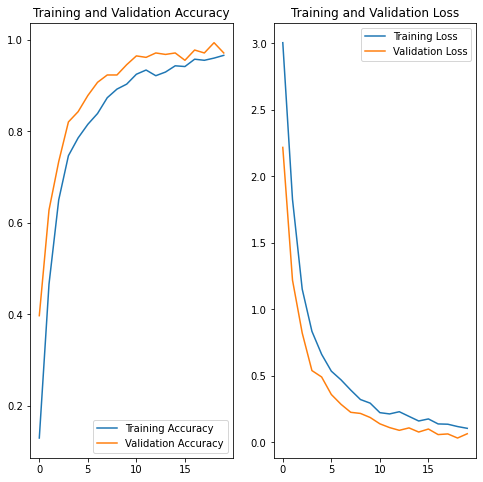

In [30]:
# Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
# Evaluation
p_pred = model.predict(X_test)
y_pred = np.where(p_pred > 0.5, 1, 0)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      0.92      0.96        12
          10       1.00      0.75      0.86        12
          11       1.00      1.00      1.00        12
          12       1.00      0.75      0.86        12
          13       0.80      1.00      0.89        12
          14       1.00      1.00      1.00        12
          15       1.00      0.92      0.96        12
          16       1.00      1.00      1.00        12
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.036049433052539825
Test accuracy: 0.9871794581413269


In [ ]:
print(X_test[0])
print(y_test[0])

(-0.5, 99.5, 99.5, -0.5)

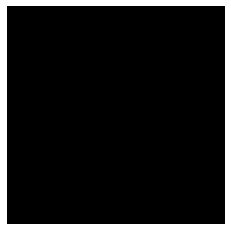

In [81]:
plt.imshow(X_test[i].astype("uint8"))
plt.axis("off")

In [58]:
classes_folder = sorted(os.listdir('/content/drive/MyDrive/Citra BISINDO'))

In [65]:
X_test.shape[0]

312

In [84]:
X_test.shape


(312, 100, 100, 3)

In [ ]:
# Test image in folder 'test'
!find . -name ".DS_Store" -delete

from keras.preprocessing import image
import numpy as np
import os

directory = 'test/'
image_name = []
images = []
collect_img = []
count_img = 9
classes_folder = sorted(os.listdir('/content/drive/MyDrive/Citra BISINDO'))

# for img in list_file[:count_img]:
#     image_name.append(img)
#     img = os.path.join(directory, img)
#     img = image.load_img(img, target_size=size_img)
#     img_np = image.img_to_array(img)
#     img = np.expand_dims(img_np, axis=0)
#     images.append(img)
#     collect_img.append(img_np)

# images = np.vstack(images)

classes_pred = model.predict(X_test)

plt.figure(figsize=(20, 20))
for i in range(len(X_test[0][:count_img][:count_img])):
    idX_class = int(classes[i][0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"))
    plt.title(classes_folder[i])
    plt.axis("off")

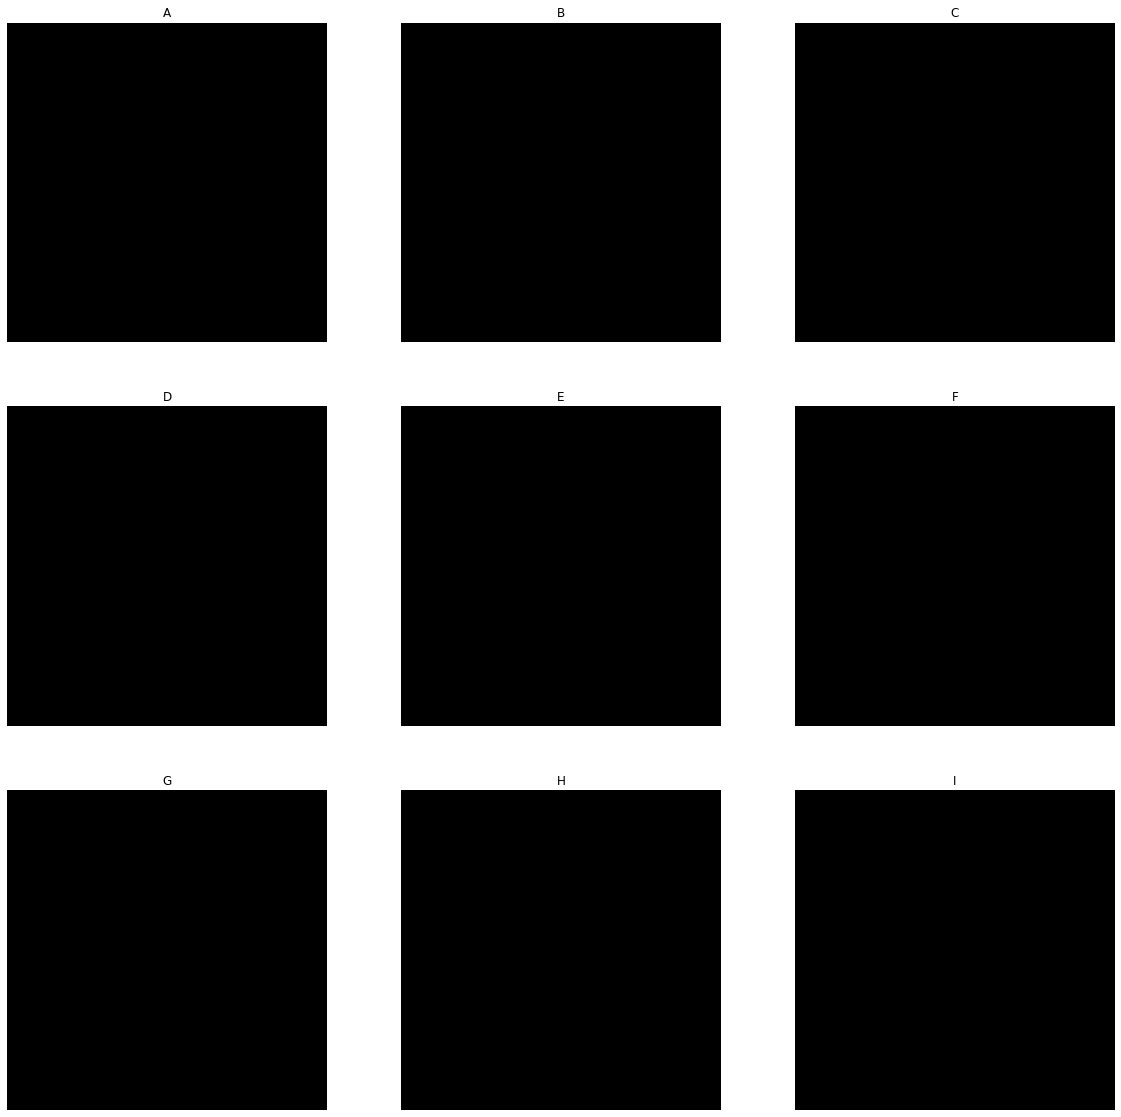

In [63]:
# Test image in folder 'test'
!find . -name ".DS_Store" -delete

from keras.preprocessing import image
import numpy as np
import os
directory = 'test/'
image_name = []
images = []
collect_img = []
count_img = 9
list_file = sorted(os.listdir(directory))

for img in list_file[:count_img]:
    image_name.append(img)
    img = os.path.join(directory, img)
    img = image.load_img(img, target_size=size_img)
    img_np = image.img_to_array(img)
    img = np.expand_dims(img_np, axis=0)
    images.append(img)
    collect_img.append(img_np)

images = np.vstack(images)
classes = model.predict(images)

plt.figure(figsize=(20, 20))
for i in range(len(list_file[:count_img][:count_img])):
    idX_class = int(classes[i][0])
    ax = plt.subplot(3, 3, i + 1)

    if idX_class == 1:
      # print(i+1, image_name[i],'    ', name_class[1])
      plt.imshow(collect_img[i].astype("uint8"))
      plt.title(image_name[i]+' '+name_class[1])
      plt.axis("off")
      
    else:
      # print(i+1, image_name[i],'    ', name_class[0])
      plt.imshow(collect_img[i].astype("uint8"))
      plt.title(image_name[i]+' =>'+name_class[0])
      plt.axis("off")

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
submission_df['file']

0       img_10011.jpg
1       img_10034.jpg
2       img_10062.jpg
3       img_10068.jpg
4       img_10094.jpg
            ...      
4010    img_99640.jpg
4011    img_99651.jpg
4012    img_99652.jpg
4013    img_99715.jpg
4014    img_99785.jpg
Name: file, Length: 4015, dtype: object

In [ ]:
submission_df['label']

0       0
1       0
2       0
3       0
4       0
       ..
4010    1
4011    1
4012    1
4013    1
4014    1
Name: label, Length: 4015, dtype: object

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)